# Ejercicio IV Subset selection

Se el aplicará subset selection, tanto el forward como con el backward selection a la data MPG clasificación. Analizar y comparar resultados usando todos los features y las versiones reducidas.

Carlos Cornielle - 1077018

El algoritmo utilizado para probar tanto el Forward como el Backward Selection fue el KNN-Clasificación para el Data set de MPG

Primero se analizará usando todos los features

In [45]:
import pandas as pd
import numpy as np
from scipy import linalg
import random
from scipy.spatial import distance
import scipy.spatial
from collections import Counter
from scipy.stats import norm
import random
import matplotlib.pyplot as plt
from statistics import mode 
import sys
import itertools
from matplotlib.pyplot import *

In [2]:
class KNN:
    def __init__(self, k):
        self.k = k
            
    def predict(self, X_test):
        final_output = []
        for i in range(len(X_test)):
            d = []
            votes = []
            for j in range(len(X_train)):
                    dist= np.sqrt(np.sum((X_train[j]-X_test[i])**2).astype(float))
                    d.append([dist, j])
            d.sort()
            d = d[0:self.k]
            for d, j in d:
                votes.append(y_train[j])
            ans = Counter(votes).most_common(1)[0][0]
            final_output.append(ans)
            
        return final_output
    
    def score(self, X_test, y_test):
        predictions = self.predict(X_test)
        return (predictions == y_test).sum() / len(y_test)

Se importa el data set de MPG

In [3]:
df = pd.read_excel("Dataset_MPG1.xlsx", sheet_name='Dataset_MPG', header = None, dtype = float) # Carga del set de datos
df_values= df.values
df

,0,1,2,3,4,5,6,7
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0
...,...,...,...,...,...,...,...,...
393,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0
394,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0
395,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0
396,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0


Se hace una separación de las clases en 10 clases utilizando 10 rangos igualmente espaciados de MPG

In [4]:
df_mpg = df_values[:,0]
mpg = df_mpg.copy()
mpg_min = min(mpg)
mpg_max = max(mpg)
grupos = np.linspace(mpg_min,mpg_max,10)
grupos

array([ 9.        , 13.17777778, 17.35555556, 21.53333333, 25.71111111,
       29.88888889, 34.06666667, 38.24444444, 42.42222222, 46.6       ])

In [5]:
mpg[mpg<grupos[1]] =1
mpg[np.logical_and(mpg>=grupos[1], mpg<grupos[2])] = 2
mpg[np.logical_and(mpg>=grupos[2], mpg<grupos[3])] = 3
mpg[np.logical_and(mpg>=grupos[3], mpg<grupos[4])] = 4
mpg[np.logical_and(mpg>=grupos[4], mpg<grupos[5])] = 5
mpg[np.logical_and(mpg>=grupos[5], mpg<grupos[6])] = 6
mpg[np.logical_and(mpg>=grupos[6], mpg<grupos[7])] = 7
mpg[np.logical_and(mpg>=grupos[7], mpg<grupos[8])] = 8
mpg[np.logical_and(mpg>=grupos[8], mpg<grupos[9])] = 9
mpg[mpg>=grupos[9]] = 10

In [6]:
df_group = df_values.copy()
df_features = df_group[:,1:8]
df_group[:,0] =mpg
df_group.shape

(398, 8)

Función para realizar la permutación de la data

In [7]:
# Funcion para realizar la permutacion de los datos
def permutacion(train_size,semilla,f):
    np.random.seed(semilla)
    idx= np.random.rand(len(df_group))<train_size
   
    train = df_group[idx]
    train= np.array(train)
    train_mpg = train[:,0]
    train_x= train[:,1:f]
    
    test = df_group[~idx]
    test= np.array(test)
    test_mpg = test[:,0]
    test_x= test[:,1:f]
    
    return train_mpg,train_x, test_mpg,test_x,idx

In [8]:
train_size= 0.73
semilla=50
f=8
y_train,X_train,y_test,X_test,idx = permutacion(train_size,semilla,f)
X_train.shape

(297, 7)

In [46]:
clf = KNN(11) 
a=clf.score(X_test,y_test)
original =a 
original

0.48514851485148514

El forward selection es un tipo de selección donde se analiza el desempeño de cada una de las variables de manera individual en el modelo y la que entregue un mejor desempeño será la seleccionada para aplicar el forward selection donde se probarán todas la combinaciones posibles de los demás features con ese feature que arrojó el mejor desempeño de manera individual

Para el feature posicion 0 

In [10]:
puntaje_fwknn = np.ones(X_train.shape[1])

X_train_orig = X_train.copy()
X_test_orig = X_test.copy()

X_train=X_train_orig.copy()
X_train_= X_train_orig[:,0]

X_test=X_test_orig.copy()
X_test= X_test[:,0]   

    
clf = KNN(11)
a=clf.score(X_test,y_test)
puntaje_fwknn[0] = a   


In [11]:
puntaje_fwknn

array([0.13861386, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [12]:
# Se evalua el error de cada feature de manera individual 

for i in range(1,X_train_orig.shape[1]): #Ciclo del tamaño de filas es decir por la cantidad de features
    
    X_train=X_train_orig.copy() # Se copia la matriz original
    X_train_= X_train_orig[:,i] # Se coloca en la columna de la posicion i por lo que se evalua cada feature de manera individual

    X_test=X_test_orig.copy()
    X_test= X_test[:,i]   
    
    
    clf = KNN(11) # Primera corrida del algoritmo con un solo valor de Z
    a=clf.score(X_test,y_test) # Se calcula knn con cada feature
    puntaje_fwknn[i] = a   # Se acumulan las distintas tasas de aciertos 

In [13]:
X_test.shape

(101,)

In [14]:
puntaje_fwknn

array([0.13861386, 0.13861386, 0.13861386, 0.25742574, 0.13861386,
       0.13861386, 0.13861386])

La mejor tasa de aciertos se obtuvo con el feature 3 que corresponde al peso la tasa de aciertos fue de 25.74%

### Forward Selection

El forward selection es un tipo de selección donde se analiza el desempeño de cada una de las variables de manera individual en el modelo y la que entregue un mejor desempeño será la seleccionada para aplicar el forward selection donde se probarán todas la combinaciones posibles de los demás features con ese feature que arrojó el mejor desempeño de manera individual.

A partir de aquí se hacen todas las combinaciones de los demás feature para el feature 3

In [15]:
t = [0,1,2,4,5,6] # se introducen los valores para determinar las distintas combinaciones
c = set(itertools.combinations(t, 1)) # se usa una herramienta para hacer iteraciones para usar las distintas combinaciones
d= list(c) # se convierten estas combinaciones en una lista para poder utilizarse mas adelante

Ciclo para evaluar el feature 3 y su combinación con cada uno de los demás features

In [16]:
puntaje_fwknn_1=np.ones(len(d)) # variable que se utilizará para presentar los resultados 
for i in range(0,len(d)):
    
    X_train=X_train_orig.copy() # se copia la matriz con todos los features de train
    train_3 = X_train[:,3] # Se elige el feature o los features en base a los que se harán las combinaciones
    X_train_i= X_train_orig[:,d[i]] # se seleccionan los distintos features para las combinaciones
    X_train= np.column_stack((train_3,X_train_i)) # se concatenan los features
    
    X_test=X_test_orig.copy()
    test_3 = X_test[:,3]
    X_test_i= X_test_orig[:,d[i]]
    X_test= np.column_stack((test_3,X_test_i)) 
    
    
    clf = KNN(11)  # se llama a la clase KNN y se concatenan los resultados
    a=clf.score(X_test,y_test)
    puntaje_fwknn_1[i] = a   

In [17]:
puntaje_fwknn_1

array([0.48514851, 0.5049505 , 0.3960396 , 0.46534653, 0.47524752,
       0.48514851])

El mejor resultado para estas iteraciones 50.49% la proporcionó la combinación con el feature 1 por lo que se siguen haciendo combinaciones con estos dos featurs (3 1)

In [18]:
t = [0,2,4,5,6]
c = set(itertools.combinations(t, 1))
d= list(c)

In [19]:
puntaje_fwknn_2=np.ones(len(d)) # variable que se utilizará para presentar los resultados 
for i in range(0,len(d)):
    
    X_train=X_train_orig.copy()
    train_3 = X_train[:,3]
    train_1 = X_train[:,1]
    X_train_i= X_train_orig[:,d[i]]
    X_train= np.column_stack((train_3,train_1,X_train_i))
    
    X_test=X_test_orig.copy()
    test_3 = X_test[:,3]
    test_1 = X_test[:,1]
    X_test_i= X_test_orig[:,d[i]]
    X_test= np.column_stack((test_3,test_1,X_test_i)) 
    
    
    clf = KNN(11) 
    a=clf.score(X_test,y_test)
    puntaje_fwknn_2[i] = a   

In [59]:
puntaje_fwknn_final=puntaje_fwknn_2[3]
puntaje_fwknn_final

0.5148514851485149

El mejor resultado para estas iteraciones 51.48% la proporcionó la combinación con el feature 4 por lo que se siguen haciendo combinaciones con estos dos features (3 1 5)

In [21]:
t = [0,2,4,6]
c = set(itertools.combinations(t, 1))
d= list(c)

In [22]:
puntaje_fwknn_3=np.ones(len(d)) # variable que se utilizará para presentar los resultados 
for i in range(0,len(d)):
    
    X_train=X_train_orig.copy()
    train_3 = X_train[:,3]
    train_1 = X_train[:,1]
    train_5 = X_train[:,5]
    X_train_i= X_train_orig[:,d[i]]
    X_train= np.column_stack((train_3,train_1,train_5,X_train_i))
    
    X_test=X_test_orig.copy()
    test_3 = X_test[:,3]
    test_1 = X_test[:,1]
    test_5 = X_test[:,5]
    X_test_i= X_test_orig[:,d[i]]
    X_test= np.column_stack((test_3,test_1,test_5,X_test_i)) 
    
    
    clf = KNN(11) 
    a=clf.score(X_test,y_test)
    puntaje_fwknn_3[i] = a   

In [23]:
puntaje_fwknn_3

array([0.3960396 , 0.51485149, 0.51485149, 0.5049505 ])

El mejor resultado para estas iteraciones 51.48% la proporcionó la combinación con el feature 0 por lo que se siguen haciendo combinaciones con estos dos features (3 1 5 0)

In [24]:
t = [2,4,6]
c = set(itertools.combinations(t, 1))
d= list(c)

In [25]:
puntaje_fwknn_4=np.ones(len(d)) # variable que se utilizará para presentar los resultados 
for i in range(0,len(d)):
    
    X_train=X_train_orig.copy()
    train_3 = X_train[:,3]
    train_1 = X_train[:,1]
    train_5 = X_train[:,5]
    train_0 = X_train[:,0]
    X_train_i= X_train_orig[:,d[i]]
    X_train= np.column_stack((train_3,train_1,train_5,train_0,X_train_i))
    
    X_test=X_test_orig.copy()
    test_3 = X_test[:,3]
    test_1 = X_test[:,1]
    test_5 = X_test[:,5]
    test_0 = X_test[:,0]
    X_test_i= X_test_orig[:,d[i]]
    X_test= np.column_stack((test_3,test_1,test_5,test_0,X_test_i)) 
    
    
    clf = KNN(11) 
    a=clf.score(X_test,y_test)
    puntaje_fwknn_4[i] = a   

In [26]:
puntaje_fwknn_4

array([0.3960396 , 0.51485149, 0.5049505 ])

A partir del resultado obtenido aumentando la cantidad de features la tasa de aciertos se esta manteniendo o bajando por lo que estos features no están ajustando de mejor manera el modelo sino que no estan aportando o esta empeorando el comportamiento de este.

Se seguiran realizando las demas combinaciones para fines demostrativos y poder observar los distintos comportamientos

Estas combinaciones seguiran a partir de agregar el feature 6 

In [27]:
t = [2,4]
c = set(itertools.combinations(t, 1))
d= list(c)

In [28]:
puntaje_fwknn_5=np.ones(len(d)) # variable que se utilizará para presentar los resultados 
for i in range(0,len(d)):
    
    X_train=X_train_orig.copy()
    train_3 = X_train[:,3]
    train_1 = X_train[:,1]
    train_5 = X_train[:,5]
    train_0 = X_train[:,0]
    train_6 = X_train[:,6]
    X_train_i= X_train_orig[:,d[i]]
    X_train= np.column_stack((train_3,train_1,train_5,train_0,train_6,X_train_i))
    
    X_test=X_test_orig.copy()
    test_3 = X_test[:,3]
    test_1 = X_test[:,1]
    test_5 = X_test[:,5]
    test_0 = X_test[:,0]
    test_6 = X_test[:,6]
    X_test_i= X_test_orig[:,d[i]]
    X_test= np.column_stack((test_3,test_1,test_5,test_0,test_6,X_test_i)) 
    
    
    clf = KNN(11) 
    a=clf.score(X_test,y_test)
    puntaje_fwknn_5[i] = a   

In [29]:
puntaje_fwknn_5

array([0.3960396, 0.5049505])

Estos dos features resultantes solo empeoran el comportamiento del modelo pero como el caso anterior estos se desarrollaran para fines demostrativos del forward selection, se tomará el feature 4

Ya que este nos indica que por lo general la cantidad total de features no es la necesaria para describir de la mejor manera el modelo ya que algunas caracteristicas son muy similares para las distintas clases 

In [30]:
t = [2]
c = set(itertools.combinations(t, 1))
d= list(c)

In [31]:
puntaje_fwknn_6=np.ones(len(d)) # variable que se utilizará para presentar los resultados 
for i in range(0,len(d)):
    
    X_train=X_train_orig.copy()
    train_3 = X_train[:,3]
    train_1 = X_train[:,1]
    train_5 = X_train[:,5]
    train_0 = X_train[:,0]
    train_6 = X_train[:,6]
    train_4 = X_train[:,4]
    X_train_i= X_train_orig[:,d[i]]
    X_train= np.column_stack((train_3,train_1,train_5,train_0,train_6,train_4,X_train_i))
    
    X_test=X_test_orig.copy()
    test_3 = X_test[:,3]
    test_1 = X_test[:,1]
    test_5 = X_test[:,5]
    test_0 = X_test[:,0]
    test_6 = X_test[:,6]
    test_4 = X_test[:,4]
    X_test_i= X_test_orig[:,d[i]]
    X_test= np.column_stack((test_3,test_1,test_5,test_0,test_6,test_4,X_test_i)) 
    
    
    clf = KNN(11) 
    a=clf.score(X_test,y_test)
    puntaje_fwknn_6[i] = a   

In [32]:
puntaje_fwknn_6

array([0.3960396])

Como tal ya se podía observar la mejor combinación de los features 3 1 5 se obtuvo una tasa de aciertos de un 51.48%

### Backward Selection

El backward selection funciona de una manera contraria al forward donde se analiza la tasa de acierto a paritr de la cantidad total de los features y se va eliminando el feature con menor tasa de acierto hasta encontrar una menor cantidad de feature que de una tasa de aciertos aún aceptable (dentro de un 5% o maximo un 10%) y nos permite trabajar con una cantidad menor de features

In [52]:
# se le devuelve a X_train y X_test los valores originales de estos set
X_train = X_train_orig.copy()
X_test = X_test_orig.copy()
X_train_bw = X_train_orig.copy() # se crea el nuevo subset que comienza con toda la data original pero se ira modificando
X_test_bw = X_test_orig.copy()

In [53]:
puntaje_bwknn=np.ones(X_train_bw.shape[1])   
for i in range (X_train_bw.shape[1]): # se realiza un for del tamaño de la cantidad de columnas (features)
        
        X_train = X_train_bw.copy() # se itera eliminando un feature a la vez para observar sus tasas de aciertos
        X_test = X_test_bw.copy()
        X_train = np.delete(X_train,i,axis=1)
        X_test = np.delete(X_test,i,axis=1)
        
        clf = KNN(11) 
        a=clf.score(X_test,y_test)
        puntaje_bwknn[i]= a   #Variable para guardar la tasa de cada uno de los features a medida que se eliminan

# Se busca el feature de peor resultado 
least_feature = np.argsort(puntaje_bwknn)

#Se elimina esta pero feature de bw subset
X_train_bw = X_train_bw.copy()
X_train_bw =np.delete(X_train_bw,least_feature[-1],axis=1)
X_test_bw = X_test_bw.copy()
X_test_bw =np.delete(X_test_bw,least_feature[-1],axis=1)  

X_train = X_train_bw.copy()
X_test = X_test_bw.copy()

# sin el feature eliminado se calcula la tasa de aciertos del subset
clf = KNN(11) 
a=clf.score(X_test,y_test)
puntaje_bwknn_sbset= a   #tasa restante 
puntaje_bwknn_sbset

0.504950495049505

Eliminando el feature 2 se obtuvo 50.49%

In [54]:
puntaje_bwknn=np.ones(X_train_bw.shape[1])   
for i in range (X_train_bw.shape[1]):
        
        X_train = X_train_bw.copy()
        X_test = X_test_bw.copy()
        X_train = np.delete(X_train,i,axis=1)
        X_test = np.delete(X_test,i,axis=1)
        
        clf = KNN(11) 
        a=clf.score(X_test,y_test)
        puntaje_bwknn[i]= a   #tasa restante 

# Se busca el feature de peor resultado 
least_feature = np.argsort(puntaje_bwknn)

#Se elimina esta pero feature de bw subset
X_train_bw = X_train_bw.copy()
X_train_bw =np.delete(X_train_bw,least_feature[-1],axis=1)
X_test_bw = X_test_bw.copy()
X_test_bw =np.delete(X_test_bw,least_feature[-1],axis=1)  

X_train = X_train_bw.copy()
X_test = X_test_bw.copy()

# sin el feature eliminado se calcula la tasa de aciertos del subset
clf = KNN(11) 
a=clf.score(X_test,y_test)
puntaje_bwknn_sbset= a   #tasa restante 
puntaje_bwknn_sbset

0.5148514851485149

Al eliminar el feature 4 se obtuvo 51.48% de tasa de aciertos

In [55]:
puntaje_bwknn=np.ones(X_train_bw.shape[1])   
for i in range (X_train_bw.shape[1]):
        
        X_train = X_train_bw.copy()
        X_test = X_test_bw.copy()
        X_train = np.delete(X_train,i,axis=1)
        X_test = np.delete(X_test,i,axis=1)
        
        clf = KNN(11) 
        a=clf.score(X_test,y_test)
        puntaje_bwknn[i]= a   #tasa restante 

# Se busca el feature de peor resultado 
least_feature = np.argsort(puntaje_bwknn)

#Se elimina esta pero feature de bw subset
X_train_bw = X_train_bw.copy()
X_train_bw =np.delete(X_train_bw,least_feature[-1],axis=1)
X_test_bw = X_test_bw.copy()
X_test_bw =np.delete(X_test_bw,least_feature[-1],axis=1)  

X_train = X_train_bw.copy()
X_test = X_test_bw.copy()

# sin el feature eliminado se calcula la tasa de aciertos del subset
clf = KNN(11) 
a=clf.score(X_test,y_test)
puntaje_bwknn_sbset= a   #tasa restante 
puntaje_bwknn_sbset

0.5148514851485149

Eliminando el feature 6 se mantiene la tasa de aciertos con 51.48%

In [56]:
puntaje_bwknn=np.ones(X_train_bw.shape[1])   
for i in range (X_train_bw.shape[1]):
        
        X_train = X_train_bw.copy()
        X_test = X_test_bw.copy()
        X_train = np.delete(X_train,i,axis=1)
        X_test = np.delete(X_test,i,axis=1)
        
        clf = KNN(11) 
        a=clf.score(X_test,y_test)
        puntaje_bwknn[i]= a   #tasa restante 

# Se busca el feature de peor resultado 
least_feature = np.argsort(puntaje_bwknn)

#Se elimina esta pero feature de bw subset
X_train_bw = X_train_bw.copy()
X_train_bw =np.delete(X_train_bw,least_feature[-1],axis=1)
X_test_bw = X_test_bw.copy()
X_test_bw =np.delete(X_test_bw,least_feature[-1],axis=1)  

X_train = X_train_bw.copy()
X_test = X_test_bw.copy()

# sin el feature eliminado se calcula la tasa de aciertos del subset
clf = KNN(11) 
a=clf.score(X_test,y_test)
puntaje_bwknn_sbset= a   #tasa restante 
puntaje_bwknn_final= puntaje_bwknn_sbset
puntaje_bwknn_final

0.5148514851485149

Eliminando el feature 0 aún se mantiene la tasa de aciertos en 51.48%

In [38]:
puntaje_bwknn=np.ones(X_train_bw.shape[1])   
for i in range (X_train_bw.shape[1]):
        
        X_train = X_train_bw.copy()
        X_test = X_test_bw.copy()
        X_train = np.delete(X_train,i,axis=1)
        X_test = np.delete(X_test,i,axis=1)
        
        clf = KNN(11) 
        a=clf.score(X_test,y_test)
        puntaje_bwknn[i]= a   #tasa restante 

# Se busca el feature de peor resultado 
least_feature = np.argsort(puntaje_bwknn)

#Se elimina esta pero feature de bw subset
X_train_bw = X_train_bw.copy()
X_train_bw =np.delete(X_train_bw,least_feature[-1],axis=1)
X_test_bw = X_test_bw.copy()
X_test_bw =np.delete(X_test_bw,least_feature[-1],axis=1)  

X_train = X_train_bw.copy()
X_test = X_test_bw.copy()

# sin el feature eliminado se calcula la tasa de aciertos del subset
clf = KNN(11) 
a=clf.score(X_test,y_test)
puntaje_bwknn_sbset= a   #tasa restante 
puntaje_bwknn_sbset

0.504950495049505

Eliminando el feature 5 la tasa de aciertos resulta ser 50.49%

In [39]:
puntaje_bwknn=np.ones(X_train_bw.shape[1])   
for i in range (X_train_bw.shape[1]):
        
        X_train = X_train_bw.copy()
        X_test = X_test_bw.copy()
        X_train = np.delete(X_train,i,axis=1)
        X_test = np.delete(X_test,i,axis=1)
        
        clf = KNN(11) 
        a=clf.score(X_test,y_test)
        puntaje_bwknn[i]= a   #tasa restante 

# Se busca el feature de peor resultado 
least_feature = np.argsort(puntaje_bwknn)

#Se elimina esta pero feature de bw subset
X_train_bw = X_train_bw.copy()
X_train_bw =np.delete(X_train_bw,least_feature[-1],axis=1)
X_test_bw = X_test_bw.copy()
X_test_bw =np.delete(X_test_bw,least_feature[-1],axis=1)  

X_train = X_train_bw.copy()
X_test = X_test_bw.copy()

# sin el feature eliminado se calcula la tasa de aciertos del subset
clf = KNN(11) 
a=clf.score(X_test,y_test)
puntaje_bwknn_sbset= a   #tasa restante 
puntaje_bwknn_sbset

0.48514851485148514

Eliminando el feature 1 la tasa de aciertos disminuye a ser 48.51%

Utilizando backward selection la mejor tasa de aciertos coincide con la de forward selection al igual que los features que se estan utilizando 51.48% con los features 3, 1 y 5 mientras que ambos coincidieron que con solamente los features 3 y 1 se obtuvo una tasa de aciertos de 50.49% 

In [62]:
local_vars = list(locals().items())
for var, obj in local_vars:
    print(var, sys.getsizeof(obj))

__name__ 57
__doc__ 113
__package__ 16
__loader__ 16
__spec__ 16
__builtin__ 80
__builtins__ 80
_ih 640
_oh 1184
_dh 72
In 640
Out 1184
get_ipython 64
exit 56
quit 56
_ 32
__ 136
___ 32
_i 147
_ii 355
_iii 107
_i1 361
pd 80
np 80
linalg 80
random 80
distance 80
scipy 80
Counter 1056
norm 56
plt 80
mode 136
time 80
timeit 80
itertools 80
_i2 812
KNN 1056
_i3 193
df 25624
df_values 112
_3 25624
_i4 178
df_mpg 96
mpg 3280
mpg_min 32
mpg_max 32
grupos 96
_4 96
_i5 535
_i6 140
df_group 25584
df_features 112
_6 64
_i7 487
permutacion 136
_i8 164
train_size 24
semilla 28
f 28
y_train 96
X_train 7240
y_test 96
X_test 2536
idx 494
_8 64
_i9 91
clf 56
a 32
_9 32
_i10 327
puntaje_fwknn 152
X_train_orig 16744
X_test_orig 5768
X_train_ 96
_i11 62
_11 152
_i12 1357
i 28
_i13 61
_13 56
_i14 62
_14 152
_i15 357
t 72
c 224
d 96
_i16 1640
puntaje_fwknn_1 144
train_3 96
X_train_i 112
test_3 96
X_test_i 112
_i17 64
_17 144
_i18 113
_i19 1205
puntaje_fwknn_2 136
train_1 96
test_1 96
_i20 64
_20 136
_i21 11

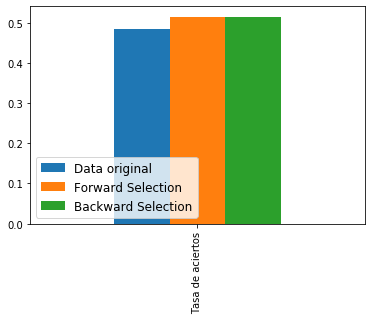

In [60]:
fig, ax = subplots()
df_histo = pd.DataFrame({'Data original':original, 'Forward Selection':puntaje_fwknn_final,'Backward Selection':puntaje_bwknn_final}, index=['Tasa de aciertos'])
df_histo.plot(kind='bar', ax=ax)
ax.legend(["Data original", "Forward Selection","Backward Selection"],loc=3, fontsize=12);